## Индикаторы оттока клиентов фитнес-центра

### План исследования:

##### Шаг 1
- Загрузить данные, получить первичное представление и проверить на пропуски и дубликаты.

##### Шаг 2
- Изучить средние значения и стандартные отклонения;
- Посмотреть на средние значения признаков в двух группах;
- Построить столбчатые гистограммы и распределения признаков для двух групп;
- Построить матрицу корреляции.

##### Шаг 3
- Построить модель бинарной классификации пользователей с целевым признаком;
- Разбить данные на обучающую и валидационную выборку;
- Обучить модель на train-выборке для логической регрессии и для случайного леса;
- Оценить метрики accuracy, precision и recall, и сравнить модели по ним.

##### Шаг 4. 
- Стандартизировать данные;
- Построить матрицу расстояний и нарисовать дендограмму;
- Обучить модель кластеризации для пяти кластеров;
- Определить средние значения признаков для кластеров;
- Построить распределения признаков для кластеров;
- Для каждого кластера посчитать долю оттока клиентов.

##### Шаг 5
- Написать общий вывод и предложить рекомендации для стратегии взаимодействия с клиентами.

### Шаг 1. Загрузка данных

In [1]:
#импортируем необходимые библиотеки для работы с данными
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
#прочитаем датасет
gym = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
#первичное представление о данных
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [4]:
#посмотрим на размер датасета
gym.shape

(4000, 14)

In [5]:
#выведем первые 10 строк 
gym.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [6]:
#проверка датасета на наличие пропусков
gym.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [7]:
#проверка датасета на наличие дубликатов
gym.duplicated().sum()

0

### Вывод

##### До начала работы:
- произведено описание проекта и приведен план работы;
- импортированы библиотеки pandas, seaborn, matplotlib.pyplot, stats, numpy, math;
- импортированы необходимые библиотеки для машинного обучения.

##### Первичная работа с данными:
- прочитан датасет;
- получено первичное представление о данных;
- выведеные первые десять строк датасета;
- произведена проверка на наличие и количество дубликатов и пропущенных значений.

##### Пропущенных значений и дубликатов в датасете не обнаружено.

### Шаг 2. Исследовательский анализ данных (EDA)

In [8]:
# для начала приведем наименования столбцов к нижнему регистру
gym.columns = gym.columns.str.lower()

In [9]:
#значения столбца month_to_end_cotract приведем к целочисленному типу
gym['month_to_end_contract'] = gym['month_to_end_contract'].astype('int')

In [10]:
#посмотрим на средние значения и стандартные отклонения
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


##### Вывод или портрет среднестатистического клиента клуба:
- Как правило, среди наших клиентов поровно распределены представители и представительницы обоих полов;
- Практически 85% наших клиентов проживают или работают рядом с фитнес-центром;
- Почти половина работает в компаниях, которые нашими партнера и получают персональные предложения;
- Как это ни хотелось, но, к сожалению, только 31% наших клиентов пришли в результате акции "приведи друга" (нужно что-то с этим делать);
- В среднем, длительность действия текущего абонемента составляет пять месяцев;
- Групповые занятия практикует 41% от общего количества клиентов (тоже можно улучшить);
- Средний возраст наших клиентов 29 лет;
- В среднем клиенты тратят 147 рублей на дополнительные услуги клуба;
- Срок до окончания текущего действующего абонемента - 4 месяца;
- Время, с момента первого обращения в офис - 4 месяц;
- В среднем в неделю за все время с момента оформления абонемента посещают фитнес-центр 2 раза;
- В среднем за последний месяц посещаемость в неделю составила 2 раза;

In [11]:
#посмотрим на средние значения признаков групп тех, кто остался и тех, кто ушел в отток

gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


##### Что можно сказать (по порядку каждый столбец):
- Гендер практически одинаков в обеих случаях;
- Факт проживания в районе, где находится финтес клуб положительно сказывается на удержании клиента;
- Как правило партнерство фитнес-клубов с компаниями и предоставление скидки положительно сказывается на удержании клиента;
- Наличие промокода от друзей или знакомых играет положительную роль в удержании клиента. Мы знаем, что в финтес-клуб ходить интереснее и проще вдвоем, а тут как раз подтверждено наличие друга-участника клуба;
- Наличие контактного телефона одинаково в обоих случаях;
- Длительность текущего действующего абонемента демонстирует, что в основном отваливаются те, кто не прозанимался и двух месяцев (классический случай), а вот те, кто остался занимаютс практически шесть месяцев;
- Опять таки, как и в случае с наличием промокода от друзей и знакомых, занятия в группе позволяют удерживать клиента в течение длительного времени;
- Возраст не то что бы сильно на что-то влияет. Мне кажется, что три года не самая значительная разница, чтобы делать какие-то выводы;
- Суммарная выручка от других услуг фитнес-центра. Логично предположить, что если клиент начинает и продолжает пользоваться другими услугами финтес-центра помимо основных, то он более прочно привязался к нашему заведению;
- Срок до окончания текущего действующего абонемента - опять таки - чем дольше срок действия абонемента (например, 12 месяцев), тем меньше вероятность, что клиент отвалится;
- Как правило, большинство отваливается на первом месяце, а вот остаются со стажем более 4х месяцев;
- Средняя частота посещений в неделю, на самом деле, играет роль. Принято считать, что оптимальное количество тренировок в неделю - 2 или 3 - соответственно, те, кто придерживается этого плана, остаются нашими клиентами; а те, кто ходит по одному разу в неделю - отваливаются;
- Средняя частота посещений в неделю за предыдущий месяц подтверждает предыдущий пункт.

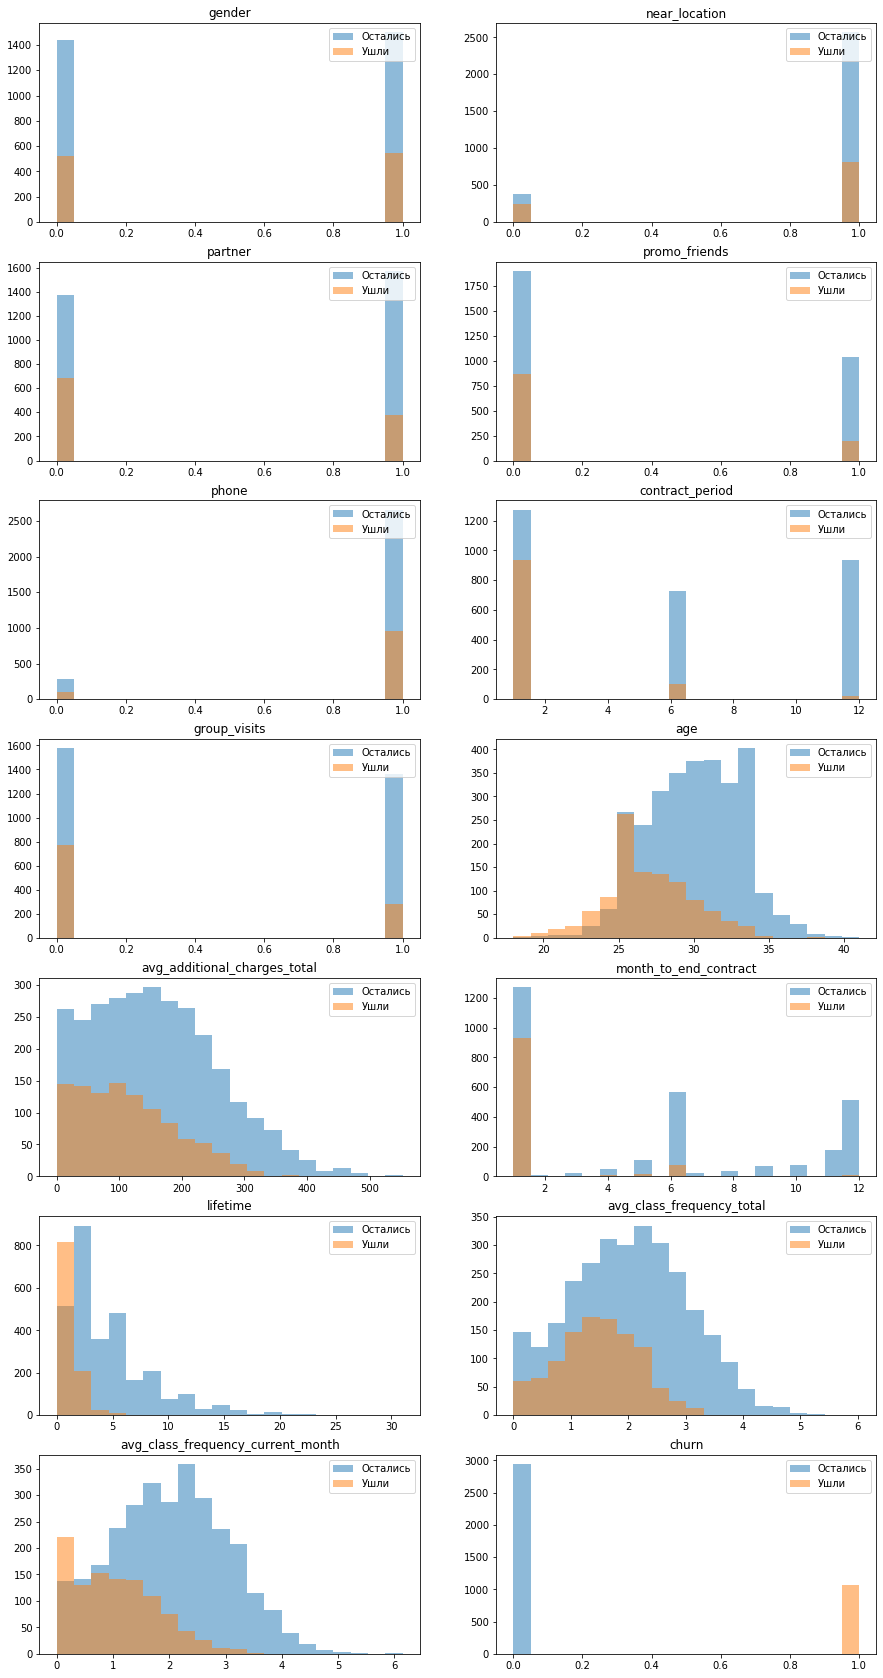

In [12]:
#построим столбчатые гистограммы и распределения для тех, кто остался и тех, кто ушел в отток
gym_churn_0 = gym.query('churn == 0')
gym_churn_1 = gym.query('churn == 1')

fig, ax = plt.subplots((len(gym.columns)+1)//2, 2, figsize = (15, 30)) #две колонки; число строк вычисляется по числу признаков
ax = ax.ravel()
for i in range(len(gym.columns)):
    col_name = gym.columns[i]
    range_hist = (gym[col_name].min(), gym[col_name].max()) #фиксация масштаба по оси Х 
    ax[i].hist(gym_churn_0[col_name], bins=20, range = range_hist, alpha = 0.5, label = 'Остались')
    ax[i].hist(gym_churn_1[col_name], bins=20, range = range_hist, alpha = 0.5, label = 'Ушли')
    ax[i].legend(loc='upper right')
    ax[i].set_title(col_name)
plt.show();

##### Выводы по графикам:
- Мужчин и женщин практически поровну в обеих группах (тех, кто остался и тех, кто ушел);
- Как правило, в отток уходят те, кто не проживает рядом с фитнес-центром (из общего количество клиентов около тысячи не имела фитнес-центра в своем районе и им приходилось дольше добираться до него);
- Больше осталось тех клиентов, чья компания состоит в партнерских отношениях с фитнес-центром;
- Клиенты, ставшие членами фитнес-центра по приглашению друга с большей вероятностью остаются постоянными;
- Больше склонны оставаться клиенты, которые предоставляют свой контактный телефон (хотя разве сейчас возможно оформление абонемента без этого)?
- Большая вероятность оттока у тех клиентов, которые изначально оформляют абонемент на один месяц, в то время, как от шести месяцев и до года клиенты становятся лояльны нашей компании;
- Групповые визиты способствуют удержанию клиента;
- Больше склонны к удержанию клиенты в возрасте от 26 до 34 лет;
- Те, кто больше тратит денег в сопутствуюших услугах фитнес-центра(кафе, сауна, массаж и т.д) сильнее привязываются к нам;
- Чем дольше времени остается до окончания срока действия абонемента, особенно 6 или 12 месяцев, тем большая вероятность удержания клиента;
- От трех до шести месяцев проходит с момента первого обращения клиента в фитнес-центр, чтобы осуществилась его привязка к нашим услугам;
- У тех, кто ушел в отток, частота посещений за все время действия абонемента ниже, чем у тех, кто остался;
- Также у тех, кто остался выше частота посещений за предыдущий месяц, чем у тех, кто ушел в отток;
- Больше тех, кто остался ~ 75% клиентов осталось у нас в фитнес-центре.

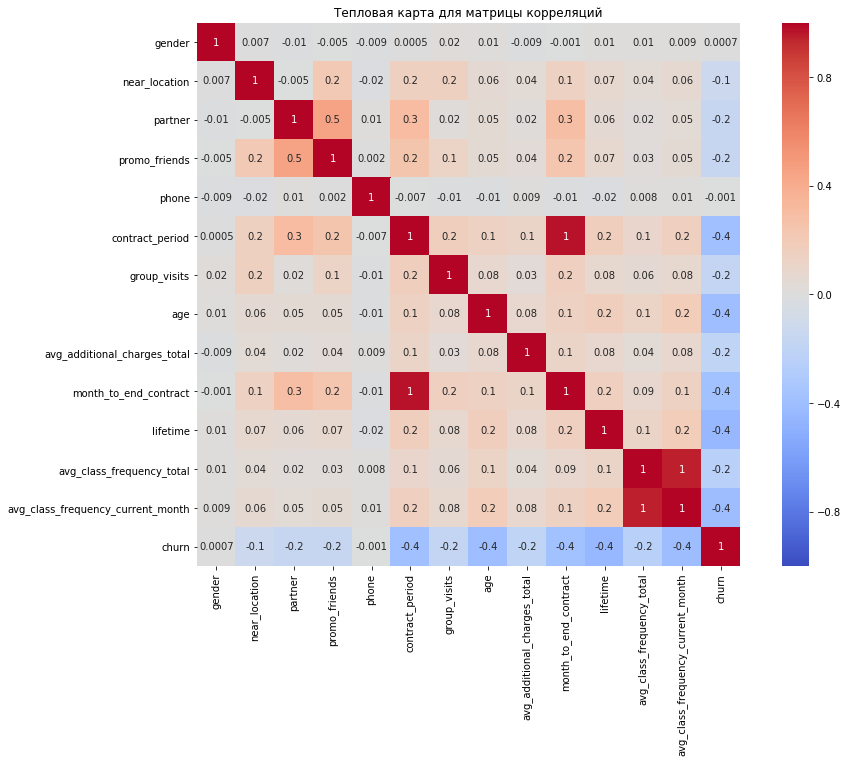

In [13]:
#построим и нарисуем матрицу корреляций
cm = gym.corr()
fig, ax = plt.subplots(figsize=(15,10))  

#построим для матрицы корреляций тепловую карту
sns.heatmap(cm, annot = True, square = True, vmin = -1, vmax = 1, center = 0, fmt='.1g', cmap= 'coolwarm')
plt.title('Тепловая карта для матрицы корреляций')
plt.show();

##### Вывод:

##### Зависимость переменной churn от других переменных:
- Во всех случаях корреляции переменной churn с остальными является отрицательной;
- Минимальная зависимость с переменными gender и phone (как мы выясним в дальнейшем, эти переменные практически не влияют на переменную churn);
- Сильнее всех отрицательная корреляция - (-0.4) - выражена с переменными contract_period, age, month_to_end_contract, lifetime, avg_class_frequency_current_month. Это прямо говорит о том, что чем ниже значения этих переменных, тем выше вероятность оттока клиентов;
- Также стоит отметить переменные parther, promo_friends, group_visits, avg_additional_charges_total и avg_class_frequency_total. Отрицательная корреляция - (-0.2) - пусть не такая сильная, как в предыдущем пункте, все же свидетельствует о том, что эти значение этих переменных также влияет на отток пользователей;

##### Другие интересные корреляции:
- Сильно зависимы переменные - (0.5) - partner и promo_friends. Очевидно, что чем больше пользуются акцией "приведи друга", то тем более приходят клиентов, которые работают в компании-партнере. Верно и обратное;
- Прослеживаются корреляции - (0.3) - между contract_period и partner. Скорее всего, компании-партнеры предлагают наиболее выгодные условия по абонементу для определенного периода действия;
- Очень сильная корреляция (1) между month_to_end_contract и contract_period;
- Очень сильная корреляция (1) между парой переменных avg_class_frequency_total и avg_class_frequency_total_month. Примечательно, что и данные между этими переменными практически не отличаются во всем датасете, так как одна переменная напрямую связана с другой. Можно сказать, что они балансируют друг друга.

### Шаг 3. Модель прогнозирования оттока пользователей

In [14]:
#функция для вывода метрик accuracy, precision и recall

#определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

#разделим данные на признаки и (X) и целевую переменную (y)
X = gym.drop('churn', axis=1)
y = gym['churn']

#разделим модель на обучающую и валидационную выборку 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify = y)

#обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

#преобразуем обучающие и валидацонные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

#логистическая регрессия

#алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state = 0, solver = 'lbfgs')
#обучение модели
lr_model.fit(X_train_st, y_train)
#прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
#вывод метрик для логистической регрессии
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')

#случайный лес

#алгоритм для модели случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
#обучение модели
rf_model.fit(X_train_st, y_train)
#прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)
#вывод метрик для случайного леса
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83


##### Вывод:
- На основании оценки метрик accuracy, precision и recall можно сделать вывод, что разницы между моделью логистической регрессии и моделью случайного леса практически нет. Обе функционируют достаточно хорошо.

### Шаг 4. Кластеризация пользователей

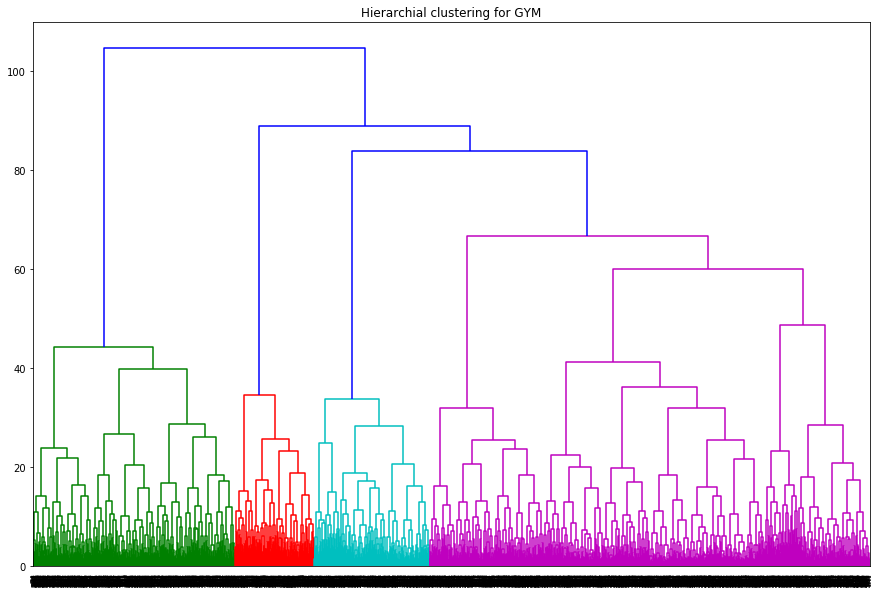

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage #дендограммы и linkage

#стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#основа для дендограммы
linked = linkage(X_sc, method = 'ward')

#строим дендограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show();

##### Согласно полученной дендограмме правильнее будет разделить данные на четыре кластера.

In [16]:
from sklearn.cluster import KMeans #для кластеров

#обучим модель кластеризации на основании K-means

#стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

km = KMeans(n_clusters = 5, random_state = 0) #пять кластеров
labels = km.fit_predict(gym.drop(columns = ['churn'], axis = 1)) #применение алгоритма к кластерам и формирование вектора

gym['cluster_km'] = labels

#статистика по средним значениям наших признаков по кластеру
print(gym.drop('churn', axis=1).groupby(['cluster_km']).mean())

              gender  near_location   partner  promo_friends     phone  \
cluster_km                                                               
0           0.514091       0.839650  0.451895       0.279883  0.897959   
1           0.511435       0.844075  0.495842       0.320166  0.902287   
2           0.468635       0.856089  0.516605       0.332103  0.926199   
3           0.508721       0.824612  0.488372       0.293605  0.907946   
4           0.521246       0.881020  0.511331       0.347025  0.898017   

            contract_period  group_visits        age  \
cluster_km                                             
0                  4.301263      0.407191  28.973761   
1                  4.755717      0.423077  29.401247   
2                  5.822878      0.431734  29.845018   
3                  4.198643      0.387597  28.908915   
4                  5.400850      0.433428  29.344193   

            avg_additional_charges_total  month_to_end_contract  lifetime  \
cluster_km 

##### Вывод:
- Можно сказать, что лучшим кластером является кластер 4 (он 10 раз продемонстрировал наилучшие результаты);
- Худшим кластером оказался кластер 5 (9 раз он продемонстрировал наихудшие результаты).

##### Как вообще можно интерпретировать кластеры ? 
Показатели кластеров соответствуют степени важности того или иного признака в нашем датасете. Допустим, что признак near_location (работа или проживание рядом с фитнес-клубом) отображает, насколько клиентам каждого кластера важно проживание или работа рядом с фитнес-клубом. Это справедливо для дискретных величин.
Однако, когда мы обращаемся к непрерывным величинам, то средние значения кластеров позволяют нам определить, например, средние расходы клиентов на дополнительные услуги фитнес-клуба (как это следует из столбца avg_additional_charges_total).

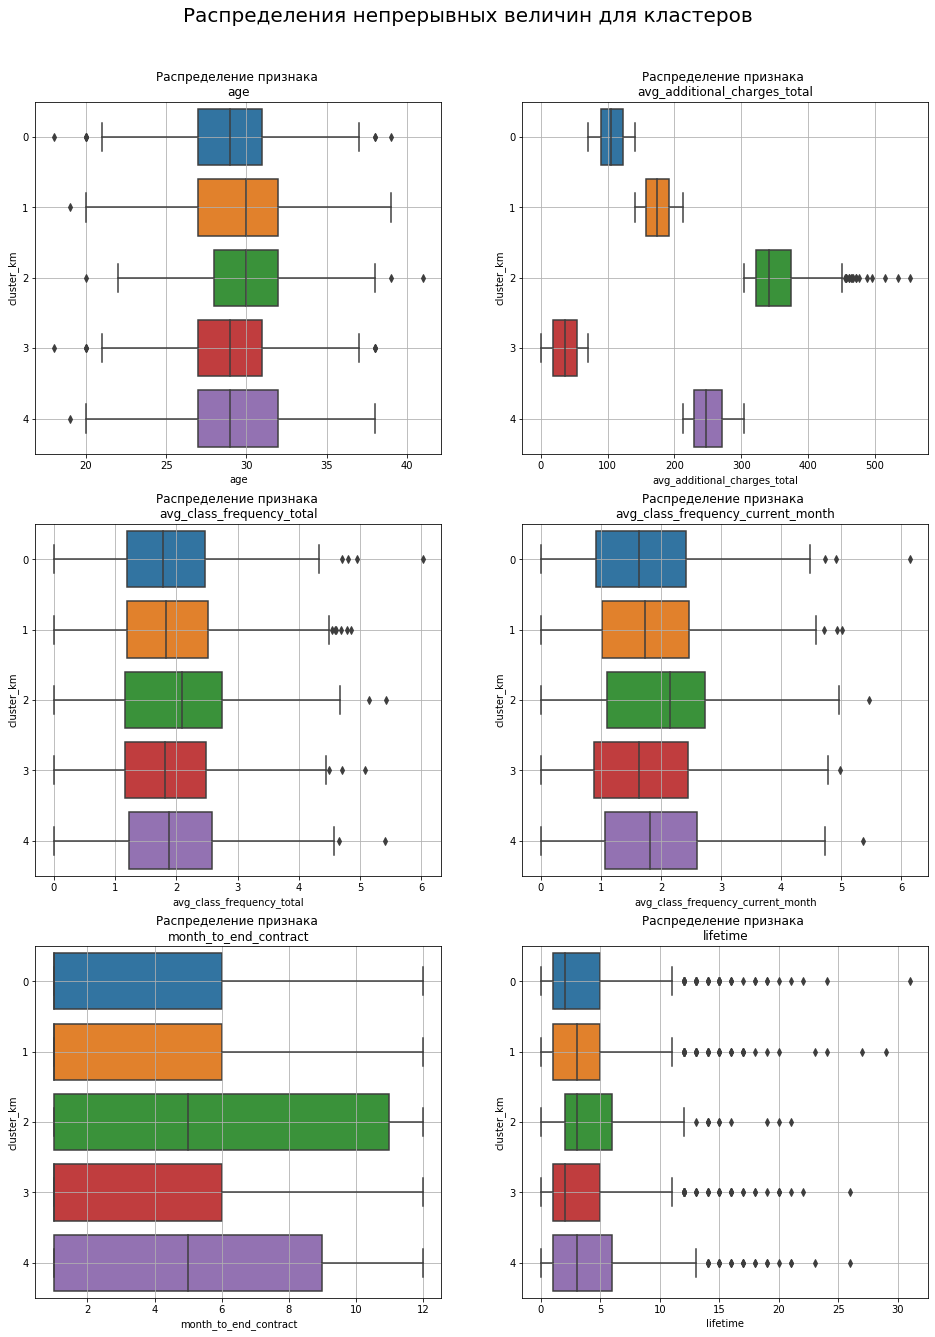

In [17]:
#отобразим распределения признаком по кластерам с помощью боксплотов дискретных и непрерывных величин

#создадим списки с дискретными и непрерывными величинами
disc_features = ['gender', 'near_location', 'partner', 
                 'promo_friends', 'phone', 'contract_period', 
                 'group_visits']
 
cont_features = ['age', 'avg_additional_charges_total', 
               'avg_class_frequency_total', 
               'avg_class_frequency_current_month', 'month_to_end_contract', 'lifetime']

#отобразим графики

#боксплоты
for i, col in enumerate(cont_features):
    plt.subplot(3, 2, i+1)
    fig = plt.gcf()
    fig.set_size_inches(16, 22)
    sns.boxplot(data = gym.drop('churn', axis=1), x = col, y = 'cluster_km', orient = 'h')
    plt.grid(True)
    plt.title('Распределение признака \n'+ str(col))
    fig.suptitle('Распределения непрерывных величин для кластеров', y = .94, fontsize=20)
plt.show()

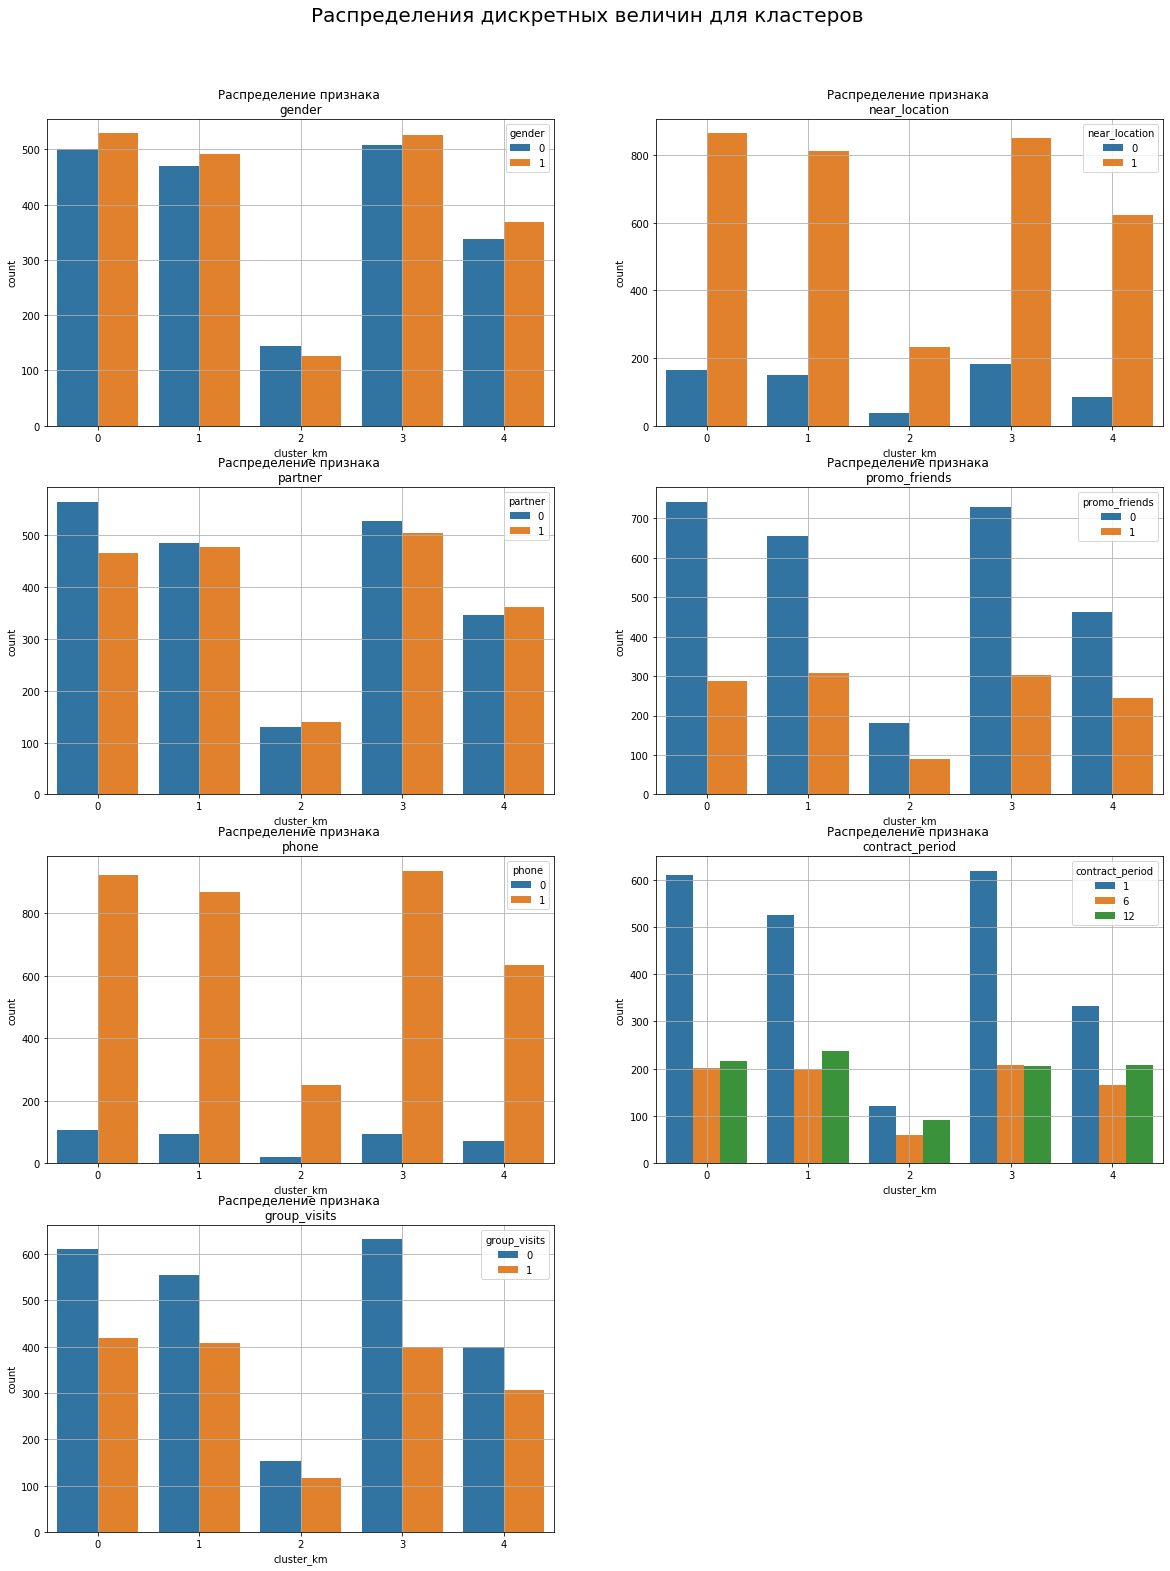

In [18]:
# каунтплоты
for i, col in enumerate(disc_features):
    plt.subplot(4, 2, i+1)
    fig = plt.gcf()
    fig.set_size_inches(20, 26)
    sns.countplot(data = gym.drop('churn', axis=1), x = 'cluster_km', hue = col)
    plt.grid(True)
    plt.title('Распределение признака \n'+ str(col))
    fig.suptitle('Распределения дискретных величин для кластеров', y = .94, fontsize=20)
plt.show();

##### Давайте на основании полученных графиков составим портреты клиентов для пяти кластеров.

##### Кластер 1:
- Возраст - 29 лет;
- Проживает или где работает в районе, где находится фитнес-центр - да;
- Сотрудник компании-партнера фитнес-центра - да;
- Групповые занятия - да;
- Запись в рамках акции "приведи друга" - выражена слабо;
- Наличие контактного телефона - да;
- Время с момента первого обращения в фитнес-центр - 1 месяц;
- Длительность текущего действующего абонемента - 4 месяца;
- Срок до окончания текущего действующего абонемента - от 1 до 6 месяцев; 
- Средняя частота посещений в неделю за все время с начала действия абонемента - 2 месяца;
- Средняя частота посещений в неделю за предыдущий месяц - 1 раз;
- Суммарная выручка от других услуг фитнес-центра - 105 рублей.

##### Кластер 2:
- Возраст - 29 лет;
- Проживает или где работает в районе, где находится фитнес-центр - да;
- Сотрудник компании-партнера фитнес-центра - да; 
- Групповые занятия - да;
- Запись в рамках акции "приведи друга" - выражена слабо;
- Наличие контактного телефона - да;
- Время с момента первого обращения в фитнес-центр - 3 месяца;
- Длительность текущего действующего абонемента - 5 месяц;
- Срок до окончания текущего действующего абонемента - от 1 до 6 месяцев;
- Средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза;
- Средняя частота посещений в неделю за предыдущий месяц - 2 раза;
- Суммарная выручка от других услуг фитнес-центра - 180 рублей.

##### Кластер 3:
- Возраст - 29 лет;
- Проживает или где работает в районе, где находится фитнес-центр - да;
- Сотрудник компании-партнера фитнес-центра - нет;
- Групповые занятия - нет;
- Запись в рамках акции "приведи друга" - выражена слабо;
- Наличие контактного телефона - да;
- Время с момента первого обращения в фитнес-центр - 3 месяца;
- Длительность текущего действующего абонемента - 5 месяц;
- Срок до окончания текущего действующего абонемента - от 1 до 8 месяцев - медиана 5;
- Средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза;
- Средняя частота посещений в неделю за предыдущий месяц - 2 раза;
- Суммарная выручка от других услуг фитнес-центра - 250 рублей.

##### Кластер 4:
- Возраст - 30 лет;
- Проживает или где работает в районе, где находится фитнес-центр - нет;
- Сотрудник компании-партнера фитнес-центра - да;
- Групповые занятия - да;
- Запись в рамках акции "приведи друга" - выражена слабо;
- Наличие контактного телефона - да;
- Время с момента первого обращения в фитнес-центр - 3 месяц;
- Длительность текущего действующего абонемента - 6 месяц;
- Срок до окончания текущего действующего абонемента - от 1 до 11 месяцев - медиана 5;
- Средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза;
- Средняя частота посещений в неделю за предыдущий месяц - 1 раз;
- Суммарная выручка от других услуг фитнес-центра - 330 рублей;

##### Кластер 5:
- Возраст - 29 лет;
- Проживает или где работает в районе, где находится фитнес-центр - да;
- Сотрудник компании-партнера фитнес-центра - да;
- Групповые занятия - выражены слабо;
- Запись в рамках акции "приведи друга" - выражена слабо;
- Наличие контактного телефона - да;
- Время с момента первого обращения в фитнес-центр - 2 месяца;
- Длительность текущего действующего абонемента - в среднем 1, 6 и 12 месяцев;
- Срок до окончания текущего действующего абонемента - 4 месяцев; 
- Средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза;
- Средняя частота посещений в неделю за предыдущий месяц - 2 раза;
- Суммарная выручка от других услуг фитнес-центра - 40 рублей.

In [19]:
#посчитаем долю оттока для каждого кластера
gym.groupby('cluster_km').agg({'churn' : 'mean'})

,churn
cluster_km,
0,0.334305
1,0.226611
2,0.044280
3,0.349806
4,0.178470


- Больше всего доля оттока в пятом кластере;
- Меньше всего доля оттока в четвертом кластере.

### Шаг 5. Основные выводы и рекомендации

### Общий вывод:

##### Портрет среднестатистического клиента фитнес-клуба: 
- Как правило, среди наших клиентов поровно распределены представители и представительницы обоих полов;
- Практически 85% наших клиентов проживают или работают рядом с фитнес-центром;
- Почти половина работает в компаниях, которые нашими партнера и получают персональные предложения;
- Как это ни хотелось, но, к сожалению, только 31% наших клиентов пришли в результате акции "приведи друга" (нужно что-то с этим делать);
- В среднем, длительность действия текущего абонемента составляет пять месяцев;
- Групповые занятия практикует 41% от общего количества клиентов (тоже можно улучшить);
- Средний возраст наших клиентов 29 лет;
- В среднем клиенты тратят 147 рублей на дополнительные услуги клуба;
- Срок до окончания текущего действующего абонемента - 4 месяца;
- Время, с момента первого обращения в офис - 4 месяц;
- В среднем в неделю за все время с момента оформления абонемента посещают фитнес-центр 2 раза;
- В среднем за последний месяц посещаемость наших клиентов в неделю составила 2 раза;

- На основании метрик accuracy, precision и recall одинаково себя проявили обе модели.

##### К оттоку склонны следующие типы клиентов:
- Не проживают или не работают рядом с фитнес-центром;
- Чья компания не имееет партнерских отношений с фитнес-центром;
- Пришли в рамках программы "приведи друга";
- Оформляют абонемент только на один месяц;
- Не посещают групповые занятия;
- В возрасте до 25-26 лет;
- Не тратят деньги на кафе, сауны, массажный зал и другие услуги фитнес-центра;
- До окончания срока действия абонемента менее трех месяцев;
- С момента первого обращения в фитнес-центр прошло менее трех месяцев;
- Ниже частота посещений в сравнении с теми, кто остался.

##### Особенности зависимостей переменной churn:
- Во всех случаях корреляции переменной churn с остальными является отрицательной;
- Минимальная зависимость с переменными gender и phone (значения этих переменных не влияют на факт оттока.
- Сильнее всех отрицательная корреляция - (-0.4) - выражена с переменными contract_period, age, month_to_end_contract, lifetime, avg_class_frequency_current_month. Это прямо говорит о том, что чем ниже значения этих переменных, тем выше вероятность оттока клиентов;
- Также стоит отметить переменные parther, promo_friends, group_visits, avg_additional_charges_total и avg_class_frequency_total. Отрицательная корреляция - (-0.2) - пусть не такая сильная, как в предыдущем пункте, все же свидетельствует о том, что значения этих переменных влияют на отток пользователей;

##### Получившиеся кластеры:

##### Кластер 1:
- Возраст - 29 лет;
- Проживает или где работает в районе, где находится фитнес-центр - да;
- Сотрудник компании-партнера фитнес-центра - да;
- Групповые занятия - да;
- Запись в рамках акции "приведи друга" - выражена слабо;
- Наличие контактного телефона - да;
- Время с момента первого обращения в фитнес-центр - 1 месяц;
- Длительность текущего действующего абонемента - 4 месяца;
- Срок до окончания текущего действующего абонемента - от 1 до 6 месяцев; 
- Средняя частота посещений в неделю за все время с начала действия абонемента - 2 месяца;
- Средняя частота посещений в неделю за предыдущий месяц - 1 раз;
- Суммарная выручка от других услуг фитнес-центра - 105 рублей.

##### Кластер 2:
- Возраст - 29 лет;
- Проживает или где работает в районе, где находится фитнес-центр - да;
- Сотрудник компании-партнера фитнес-центра - да; 
- Групповые занятия - да;
- Запись в рамках акции "приведи друга" - выражена слабо;
- Наличие контактного телефона - да;
- Время с момента первого обращения в фитнес-центр - 3 месяца;
- Длительность текущего действующего абонемента - 5 месяц;
- Срок до окончания текущего действующего абонемента - от 1 до 6 месяцев;
- Средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза;
- Средняя частота посещений в неделю за предыдущий месяц - 2 раза;
- Суммарная выручка от других услуг фитнес-центра - 180 рублей.

##### Кластер 3:
- Возраст - 29 лет;
- Проживает или где работает в районе, где находится фитнес-центр - да;
- Сотрудник компании-партнера фитнес-центра - нет;
- Групповые занятия - нет;
- Запись в рамках акции "приведи друга" - выражена слабо;
- Наличие контактного телефона - да;
- Время с момента первого обращения в фитнес-центр - 3 месяца;
- Длительность текущего действующего абонемента - 5 месяц;
- Срок до окончания текущего действующего абонемента - от 1 до 8 месяцев - медиана 5;
- Средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза;
- Средняя частота посещений в неделю за предыдущий месяц - 2 раза;
- Суммарная выручка от других услуг фитнес-центра - 250 рублей.

##### Кластер 4:
- Возраст - 30 лет;
- Проживает или где работает в районе, где находится фитнес-центр - нет;
- Сотрудник компании-партнера фитнес-центра - да;
- Групповые занятия - да;
- Запись в рамках акции "приведи друга" - выражена слабо;
- Наличие контактного телефона - да;
- Время с момента первого обращения в фитнес-центр - 3 месяц;
- Длительность текущего действующего абонемента - 6 месяц;
- Срок до окончания текущего действующего абонемента - от 1 до 11 месяцев - медиана 5;
- Средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза;
- Средняя частота посещений в неделю за предыдущий месяц - 1 раз;
- Суммарная выручка от других услуг фитнес-центра - 330 рублей;

##### Кластер 5:
- Возраст - 29 лет;
- Проживает или где работает в районе, где находится фитнес-центр - да;
- Сотрудник компании-партнера фитнес-центра - да;
- Групповые занятия - выражены слабо;
- Запись в рамках акции "приведи друга" - выражена слабо;
- Наличие контактного телефона - да;
- Время с момента первого обращения в фитнес-центр - 2 месяца;
- Длительность текущего действующего абонемента - в среднем 1, 6 и 12 месяцев;
- Срок до окончания текущего действующего абонемента - 4 месяцев; 
- Средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза;
- Средняя частота посещений в неделю за предыдущий месяц - 2 раза;
- Суммарная выручка от других услуг фитнес-центра - 40 рублей.

##### Кластер с наибольшей зависимостью   - кластер 4;

##### Кластер с наименьшей зависимостью - кластер 5;


### Рекомендации по работе с клиентами:
Очевидно, что для того, чтобы клиенты не только приходили, но и не уходили, необходимо их удерживать и привлекать. Поэтому следует развивать, как мне кажется, следующие направления:
- так как мы сеть, то необходимо открывать точки в разных районах, чтобы у большего количества людей была возможность пользоваться нашими услугами;
- развивать процесс групповых занятий, так как они способствуют прямому удержанию клиентов;
- для получения дополнительного дохода можно ввести в кафе, массажных и других видах услуг специальные акции;
- стимулировать клиентов сразу оформлять абонемент на длительный срок, так как так ниже вероятность оттока;
- конечно же, налаживать взаимодействие с различными компаниями, чтобы их сотрудники шли к нам, а также предлагать бонусы за реферальные приглашения (так мы не только сохраним текущих клиентов, но и привлечем больше новых).